# Project Final Report
Course and Section: DSCI 100 - 002

Author: Gwynnie Guo

## Introduction

### Background
This DSCI 100 project will investigate a question that arises from examining a real data science project conducted by a [research group in UBC](https://plai.cs.ubc.ca/) that has set up a Minecraft server to collect data about how players navigate the world. Understanding player behavior can have applications in education, user retention strategies, and personalized content delivery. One potential behavioral outcome is whether players choose to subscribe to game-related newsletters, a sign of long-term engagement.

### Question
This project will attempt to answer this broad question: 

**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**

In order to answer this broad question, I formulate a specific question from some of the variables in the dataset. My question will be: 

**Can `played hours` and `Age` accurately predict whether or not the player will subscribe to a game-related newsletter, and what is the most accurate model to predict whether a player will subscribe?** 

### Data Description 
The dataset used for this project is the `players.csv` data, which is a list of all unique players, including data about each player. There are a total of 196 observations (players) and 7 variables. 

These are the columns in the dataset:

- `experience` - The experience level of each player
- `subscribe` - Whether or not the player is subscribed to a game-related newsletter
- `hashedEmail` - The unique email/code for the player
- `played_hours` - Total number of hours played in the server
- `name` - The name of the player
- `gender` - The gender of the player
- `Age` - The age of the player

The variables of interest for this project is `played_hours` and `Age` as the predictor variables and `subscribe` as the response variables. This project could have also used `experience` and `gender` as predictor variables but because they are factor datatype variables, it is more difficult to incorporate preprocessing steps to convert them into numerically encoded variables to become quantitative predictors.

## Methods & Results

To see whether `played hours` and/or `Age` can accurately predict whether or not the player will subscribe to a game-related newsletter, I will use the K-nearest neighbors classification model to train a classifier model that uses `played_hours` and `Age` to predict whether or not the player is subscribed. Then, I will use the testing data to evaluate the accuracy, precision, and recall metrics of the model, which is tuned for the best K in the classification model. 

### Pre-processing and exploratory data analysis

First, I will load the dataset, preprocess the data, and engage in exploratory data analysis by visualizing the relationship between `played_hours` and `Age` on whether or not the player is subscribed.

In [1]:
# Run this cell to load all the necessary packages 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
set.seed(0608) # for randomization and reproducibility

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Read and load the dataset 
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


#### Cleaning and tidying the data
The variable `subscribe` is currently a logical datatype and we need to convert it to a factor datatype to make it categorical. To improve the readability and interpretability of the data, I also changed the column names from logical values of "TRUE" and "FALSE" to "Yes" and "No" to being subscribed.

There are also missing data for the players dataset. Since there are not too many NAs in the dataset, we can drop them in the dataset.

In [3]:
# Clean up the data by including the two predictor variables and response variable
# Converting the logical subscribe variable to the factor datatype
# Renaming the class labels for the subscribe variable
# Exclude the NAs in the dataset
players_clean <- players |> 
    select(subscribe, played_hours, Age) |>
    mutate(subscribe = as_factor(subscribe))|>
    mutate(subscribe = fct_recode(subscribe, "Yes" = "TRUE", "No" = "FALSE")) |>
    drop_na()

players_clean

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
Yes,30.3,9
Yes,3.8,17
No,0.0,17
⋮,⋮,⋮
No,0.3,22
No,0.0,17
No,2.3,17


#### Visualizing the relationship between predictors and response variable

It is also useful to visualize the relationship between the two predictor variables and response variable when doing exploratory data analysis to see the trends that may come through from the visualization. 

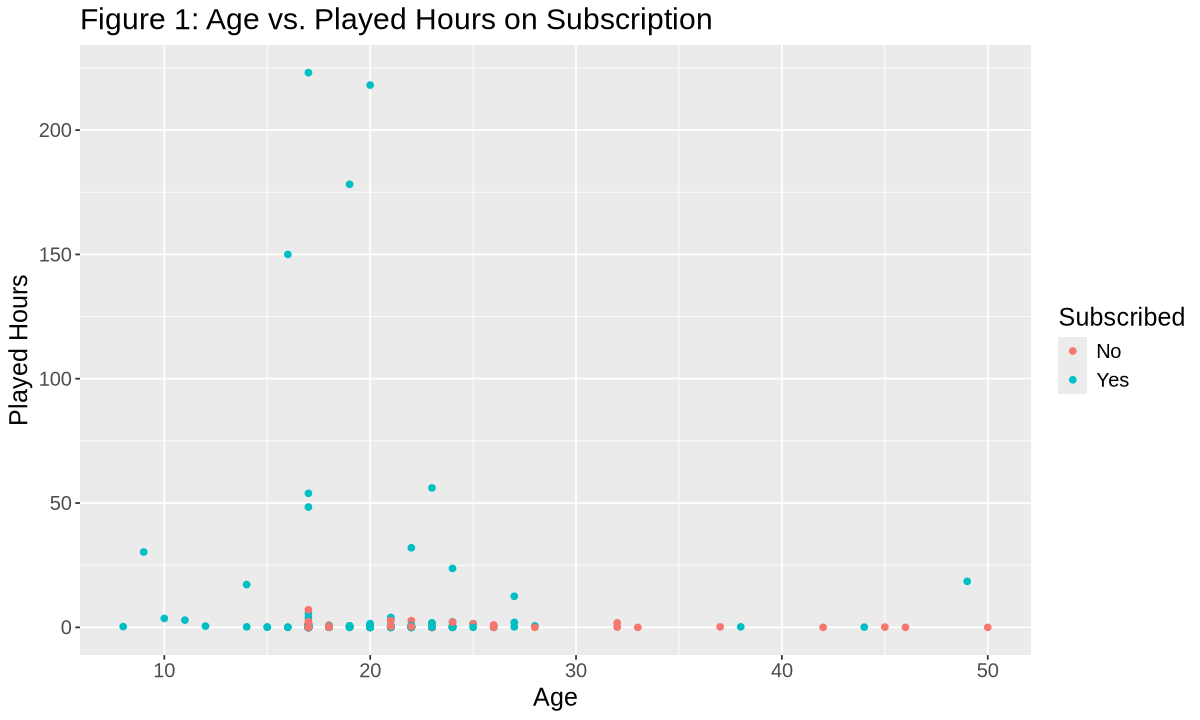

In [4]:
#plotting the training data
options(repr.plot.width = 10, repr.plot.height = 6)
players_visualalization <- ggplot(players_clean, aes(x = Age, y = played_hours, colour = subscribe)) +
                 geom_point() +
                 labs(x = "Age", y = "Played Hours",
                      color = "Subscribed", title = "Figure 1: Age vs. Played Hours on Subscription") +
                 theme(text = element_text(size = 15))

players_visualalization

*Figure 1* displays the relationship between age and played hours by subscription status. It shows that players who are subscribed tend to have more played hours with a spread of ages. Those who are not subscribed have much lower played hours. Age distribution is pretty similiar across the two classes.

### Creating the K-Nearest Neighbors Classifer 

#### Splitting the data into training and testing set

Next, I will create the classifier model by splitting the dataset into a training and testing data set using the KNN classification model. The model is good for this data as it makes no assumption about the data, can predict well on non-linear relationships, and works for smaller training datasets. I will use a 75% training and 25% testing split for a good balance between the training and testing data sets.

In [5]:
players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

# View the data
glimpse(players_train)

Rows: 145
Columns: 3
$ subscribe    <fct> No, No, No, No, No, No, No, No, No, No, No, No, No, No, N…
$ played_hours <dbl> 0.0, 0.0, 0.1, 0.0, 1.4, 0.9, 0.0, 0.1, 0.2, 0.0, 0.0, 0.…
$ Age          <dbl> 22, 23, 18, 33, 25, 18, 42, 22, 37, 28, 21, 23, 17, 18, 1…


#### Training and tuning the classifier

Afterwards, I will find the best $k$ value for the $k$-nearest neighbours that will provide the highest accuracy in predictions. In the code below, I create a classifier using a recipe and KNN specification that tunes to find the best neighbors. I will also perform cross-validation to split the training data into 5-folds for 5 different validation sets. I chose to perform 5-fold cross-validation as it is most common and 10 folds may be more computationally expensive for the model. 

In [6]:
# Recipe with standardized variables
players_recipe <- recipe(subscribe ~ played_hours + Age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# K-nearest neighbor model specification
players_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# Perform 5 fold-cross valdiation
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

# Create workflow
players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_knn) |>
    tune_grid(resamples = players_vfold, grid = k_vals) |>
    collect_metrics()

players_accuracies <- players_workflow |>
    filter(.metric == "accuracy")

players_accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4896388,5,0.05246919,Preprocessor1_Model01
2,accuracy,binary,0.4827422,5,0.04594416,Preprocessor1_Model02
3,accuracy,binary,0.6552545,5,0.03411140,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model48
49,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model49
50,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model50


To decide which number of neighbors is best to use for the highest accuracy, I will begin by plotting the accuracy versus $K$, as shown in Figure 2. 

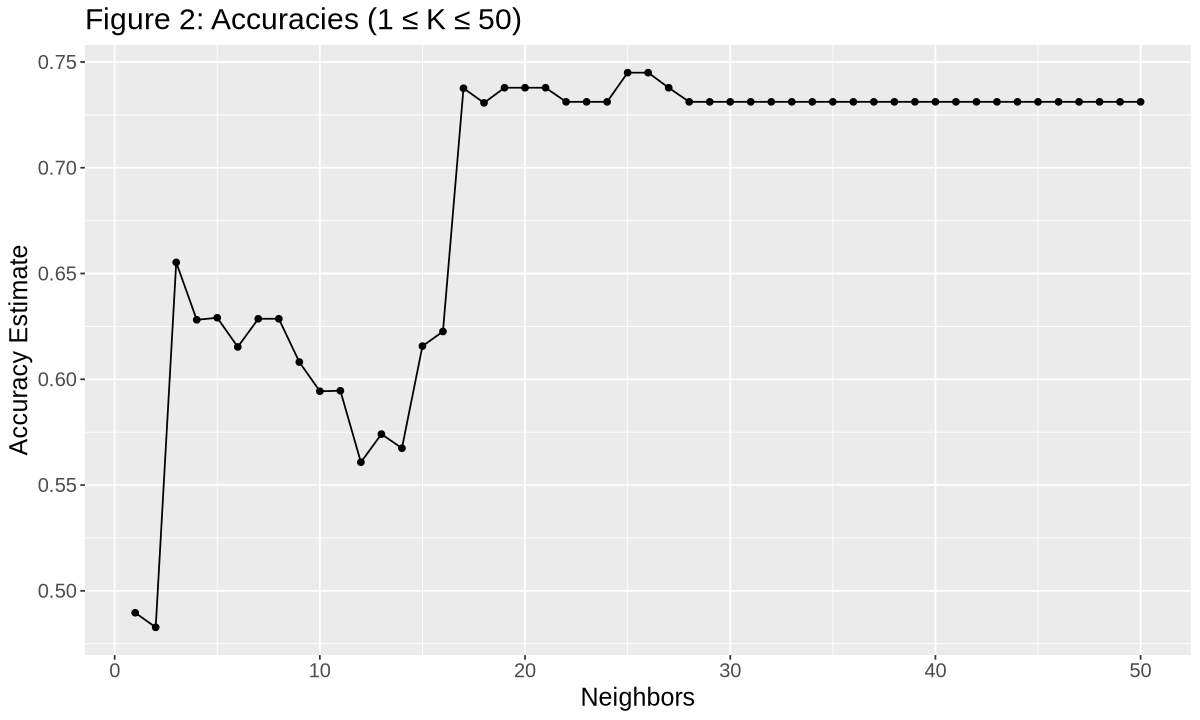

In [7]:
# Visualizing the accuracy of values for K
accuracy_versus_k <- ggplot(players_accuracies, aes(x = neighbors, y = mean)) + 
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 2: Accuracies (1 ≤ K ≤ 50)") +
    theme(text = element_text(size = 15))

accuracy_versus_k

*figure 5*

We can also obtain the number of neighbours with the highest accuracy by figuring out where the mean variable is the highest in the data frame.

In [8]:
# Finding the best k with the highest accuracy
best_k <- players_accuracies |>
    arrange(mean) |>
    tail(1) |>
    pull(neighbors) 

best_k

[1] 26

### Evaluating on the test set

Now that I have tuned the K-nearest neighbor classifier and set $K = 26$, I am done building the model and it is time to evaluate the quality of its predictions on the test data. 

We can take the same recipe but change the model specification using the best_k value. 

In [9]:
# K-nearest neighbor model specification with best K
players_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

# Create workflow
players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_knn) |>
    fit(data = players_train)

# Make predictions and evaluate the estimated accuracy of the best model on the test data
players_test_predictions <- predict(players_fit, players_test) |>
    bind_cols(players_test)

# Finds the estimated accuracy
players_test_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

players_test_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.755102


.pred_class,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
Yes,No,0,17
Yes,Yes,0,19
Yes,No,0,21
⋮,⋮,⋮,⋮
No,No,0.1,18
Yes,Yes,0.0,17
Yes,No,2.3,17


A more comprehensive view of performance other than accuracy can also obtained by finding the confusion matrix. This will also be helpful in generating the precision and recall values. 

In [10]:
# Creates the confusion matrix, identifies the areas the model is weak at classifying
players_conf_mat <- players_test_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
players_conf_mat

          Truth
Prediction No Yes
       No   1   0
       Yes 12  36

In [11]:
# Extracts the levels (two class labels) in subscribe variable 
# Useful for finding which level that the "positive" class of "Yes" corresponds to
players_levels <- players_test_predictions |> 
    pull(subscribe) |> 
    levels()
players_levels

# Computes the precision for the classifier
players_precision <- players_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second")
players_precision

# Computes the recall for the classifier
players_recall <- players_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")
players_recall

[1] "No"  "Yes"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.75


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,1


The classifier was 75.51% accurate and correctly labeled 1 observation as "No" to being subscribed and correctly labeled 36 observations as "Yes" to being subscribed. The classifier also made a certain type of repeat mistake; it labeled 12 observations as "Yes" to being subscribed when they were not subscribed, but it did not incorrectly label subscribers as non-subscribers.

This means that the classifier is more prone to predicting "Yes" to whether or not a player is subscribed and it rarely predicts "No" (only once). Precision is crucial to prevent false positives, which is determining when a player is a subscribed but actually isn't, and there is an estimated precision of 75%. Recall is crucial to prevent missed detections of the positive label ("Yes"), and there is an estimated recall of 100%, which means there are no missed labeling of "Yes".

#### Comparing to majority classifier

We can assess the relative accuracy of the classifier above by comparing it to the majority classifier for the training dataset, which always guesses the majority class label in the dataset. 

In [12]:
players_proportions <- players_train |>
    group_by(subscribe) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(players_train)) 

players_proportions #training proportions

subscribe,n,percent
<fct>,<int>,<dbl>
No,39,26.89655
Yes,106,73.10345


subscribe,n,percent
<fct>,<int>,<dbl>
No,13,26.53061
Yes,36,73.46939


A "Yes" to being subscribed represents the majority of the training data with 73.10% of all results. The accuracy from our classifer was 75.51%, which just barely has a better accuracy than the majority classifier. Therefore, this means that the classifier built with the KNN classification model did just barely better for accuracy, and it seems that the predictor variables have some slight influence on the response variable.

## Discussion

### Summary of Findings
This project investigated whether `played_hours` and `Age` can accurately predict whether a player subscribes to a game-related newsletter. Using a dataset of 194 players (2 were dropped due to missing data), the K-nearest neighbors (KNN) classification model was trained to classify players based on these two numerical predictors.

After pre-processing the data (including removing missing values and converting `subscribe` to a categorical factor), the dataset was split into training (75%) and testing (25%) sets. The model was tuned using 5-fold cross-validation to find the optimal number of neighbors (K = 26).

The final KNN model achieved an accuracy of 75.51%, which slightly outperformed the majority class baseline (73.1%). The classifier showed 100% recall for predicting subscriptions ("Yes") but had lower precision (75%), with some false positives—predicting subscription when the player was not actually subscribed. However, this isn't as detrimental as missed detections of those who are subscribed because it would not be as damaging to send a newsletter/targeted outreach to a non-subscriber compared to a subscriber who misses out on news updates.

These results suggest that played hours and age have some predictive value, but it is a very modest influence. The model tends to overpredict subscription, indicating possible class imbalance or weak predictor strength. Compared to a simple majority classifier, the KNN model barely outperformed it, reaffirming that the predictive power of `played_hours` and `Age` is limited. 

### Expected Findings 
Given that the dataset has more variables, including variables that may have a stronger predictor influence such as `experience` or `gender`, that were not used in the classifier model, it is not entirely surprising that the $k$ nearest neighbors model performed only slightly better than the baseline majority classifier. In addition, the classifier favouring the prediction of "Yes" was also not suprising as there is a class imablance between subscribers and non-subscribers. This often makes it harder for a model to accurately predict the minority class (in this case, non-subscribers).

Though, I did it find it suprising that `played_hours` and `Age` didn't have a stronger predictive power for whether a player subscribes to a game-related newsletter. I would assume that those who are older may have more resources to subscribe. This was somewhat unexpected, but it could also mean that subscription behavior might depend on qualitative motivations (e.g., experience level) that are not easily captured by quantitative metrics like hours played or age.

### Impact of Findings
These findings have meaningful implications for engagement strategies that stakeholders could take away. A classifer that can predict whether  more playing time and being older would lead to a player being more likely to subscribe to a game-related newsletter can help game developers and marketers focus on targeted outreach to increase engagement. It can save stakeholders time in deciding which groups to send when they can figure out whether or not a player would subscribe based on the quantitative data they have on them through this classification model. 

In addition, this model has a fair amount of accuracy, 75.51%, which is good for a relatively low stakes campaign that may use the classifer to find subscribers in the system and send suscriber information to them. This could be a good classifier model for an preliminary period if developers didn't have the information of players who were previously subscribed to them and wanted to classify these data points. 

### Future Questions
Some future questions to explore could definitely bring in other variables not touched in the `players.csv` data set. While this project did not incorproate categorical variables as predictors, only numerical variables, a further exploration could look at the influence of the other categorical variables: 

- Can `experience` and `gender` also accurately predict whether or not the player will subscribe to a game-related newsletter? Would the model with qualitative behavioural traits be more accurate than the quantitative traits in this model?
- Would adding more predictor variables lead to a higher accuracy in the classification model? 

Another further question can look into answering the second part of the broad question, "how do these features differ between various player types?". This question can focus on clustering as a method: 

- Beyond prediction, can clustering using the K-means algorithim uncover distinct player groups based on gameplay behaviour? 

Some other questions to explore: 

- Would more complex models (e.g., logistic regression or decision trees) come up with a more accurate model that is way better than the baseline?
- Would changing the proprotion of the training and testing data (so as to have more training data or less) lead to a higher accuracy of the model?